<a id='top'></a>

# CSCI 3202: Intro to AI - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday November ~~2~~  10, apparently**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distributions or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.  We will happily discuss ideas on your paper, however.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**: Jacob (Jake) Henson - 105963531

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Short Paper](#p2) | [Bottom](#bot)

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import heapq as hq 
import math #so I can use log 
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Part 1: The Traveling Salesman

Run the following cell to generate the data set, which is saved in the `df` dataframe by default.  You may change it to a dictionary/matrix/whatever typing you see fit.  The x and y axis are in miles, and you may assume that any pairwise distances computed are Euclidean distance

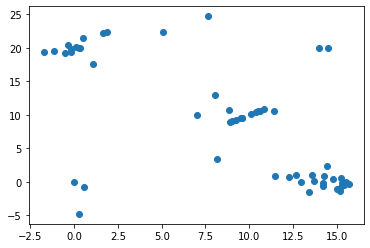

In [2]:
np.random.seed(3202)

d=np.random.multivariate_normal([14,0], [[1,0],[0,1]],20)
d2=np.random.multivariate_normal([0,20], [[1,.8],[.8,1]],12)
d3=np.random.multivariate_normal([10,10], [[1,1],[1,1]],12)
d4=[[14,20], [0,0], [7,10]]
d5={'x': np.random.random(size=10)*(20)-3, 'y': np.random.random(size=10)*30-5}
df=pd.DataFrame(data=d, columns=['x','y'])
df = df.append(pd.DataFrame(data=d2, columns=['x','y']))
df = df.append(pd.DataFrame(data=d3, columns=['x','y']))
df = df.append(pd.DataFrame(data=d4, columns=['x','y']))
df = df.append(pd.DataFrame(data=d5, columns=['x','y']))
plt.scatter(df['x'],df['y'])
#df.reset_index()

### Part A) Warmup: Rehash on A*

Turn the set of points into a graph by adding edges.  For each point, add two edges that connect that point two the nearest two other points.  Note that some points might end up with more than 3 edges, but many edges won't have to be added because nearest-other-points will often be symmetric.  After doing this, perform the $A^*$ algorithm to find the shortest path from the point at (0,0) to the point at (14,20).  Print out the path followed (as a list of coordinate pairs) and the total Euclidean distance.

Note: you probably want:
    - i) a quick function or dictionary or matrix that stores or computes the distances between two input points
    - ii) a function that computes the total distance of a path: given a list of nodes/vertices, uses the i) function to compute it's total edge cost

In [8]:
#convert coodinates to numpy array for easy processing: 
df_array = df.to_numpy()
#print(df_array)
   
#HELPER FUNCTIONS 

#distance - determine the distance between two points 
def distance(a, b):
    #euclidian distance, easiest simply using numpy 
    dist = np.linalg.norm(df_array[a] - df_array[b])
    return dist
    
#pathcost - given a list of verticies (regardless of order), determine pathcost of each edge and add together 
#TODO: refactor to work with A* given n number of neighbors for each node 
def pathcost(city_list):
    pathcost = 0  #initialize pathcost 
    for i in range(0, len(city_list)-1):
        pathcost += distance(city_list[i], city_list[i+1]) #append distance between each node to total pathcost 
        
    return round(pathcost, 2) #round for simplicity


#add edges
#create edge dictionary?
#create path function?


#do A*
#print path
#print(df_array)

### Part B) Annealing: the Salesman

In this exercise, we're going to be using simulated annealing to find solutions to the traveling salesman problem.Your two helper functions in part A should help!

In this problem, we model a salesman that tries to "reach" each city on the graph to sell their wares.  As an algorithm, the goal of the traveling salesman problem is to find the path that:
    - has the lowest total edge length (or path cost)
    - hits each and every vertex/node exactly once
    - the salesman may travel directly between *any* two cities (you will need more edges than you constructed in part A!)

We will use simulated annealing.  This means you need to come up with both a temperature function and a probability of acceptance function.  There is no guidance on these functions beyond:
    - Given a path or solution to the problem, the temperature function proposes a new solution.
    The new solutions should become more and more like the input solutions over time/as you run more iterations
    - Given two solutions, the annealing algorithm will always accept one with a shorter path cost, and will have some probability that scales with temperature/iterations and becomes less and less likely to accept a new solution with longer path cost.
    - All proposed solutions should pass through every node.
    - There are many methods to "adjust" old solutions to propose new ones.  You should consider moving a single node to another location in the list, moving entire substrings to other locations, reversing the order of substrings, etc.
    
For any temperature/probability function pair, make sure you run annealing for sufficiently different initial conditions to generate a small sample of "final solution lengths" and "number of iterations."

Typeset and describe in exact detail how you chose and implemented temperature and probability functions in the markdown cell below.


**How this implementation works:**

- First, I generate an initial path with my `intial_path` function, and then pass that inital path into the simulated annealing algo. This inital path will have the possibility of exploring every node, and is garunteed to pass through each and every node exactly once, generally giving a path length somewhere around the range of 600-900 pathcost. Initially, I implemented this as a greedy algorithm, but I re-wrote it to correspond with what the write-up was supposed to be totally random, so as to ensure it generates sufficiently *different* inital conditions each time the algo is run
- Then, I run through a for loop using a number of iterations
- For each time the loop runs....
    - I get the current <span style="color:red">temperature</span>, based on one of the two following schedule functions:
        
        - **ONE** these temperature functions I used (`schedule`) was: $$T(t) = \dfrac{C}{(t+1)^p}$$, keeping $C$ at around 70 degrees and $p$ at 0.7. This function was originally given to us in class, however, I have modified the default values here that produce a more consistent end result. I used this simply because it seemed like a fitting temperature function that was effective. 
        
        - The **ALTERNATE** temperature function (`schedule_alt`) was similar, it was based on an implemenation from mathworks.com (full URL below): $$T(t) = \dfrac{C}{(t+1)}$$. I chose this because I wanted to attempt a different decrease of temp to see if $p$ would affect the final results. I kept the C at around 90 degrees since it seemed to produce the best results on average 
        
    - Once I have current temp, I then generate a new permuation of a possible solution, using the `generate_new_path` function
        - This function will take in the current path, copy it
        - It will then generate two random numbers (within the range of the list; one is within range of the first half, the other within the second half)
        - It will create a new path based on the reversed substring of the current path determined by these two random numbers. These can be anywere from reversing two cities to the entire list
        - Depending on the value of temperature this will happen more/less times via a for loop, **such that the magnitude of the changes proposed is dependant on temperature** (i.e., there won't be *massive* changes to the list at lower temperatures, where high temperatures will keep iterating the above process a lot, generating a list with more entropy)
        
    - Once a new path is determined, the function will calculate a pathcost of both the current path and the new proposed path, and determine a delta change in past cost from the newly proposed solution (current - new) 
        - If the proposed path has a smaller path cost than the current, the algorithm will choose the proposed path; updating the new least-costly value 
        
        - Otherwise, it will determine whether to select this probability based on one of the two <span style="color:orange">$P(acceptance)$</span> equations: 
            - **ONE** of the two probability functions `p_accept_f` is similar to the one we used in class: $$p_{accept} = \exp{\left(\dfrac{\Delta E}{T(t)}\right)}$$, which uses an exponinent of e and generally appears to be one of the most commonly-used p(acceptance) functions out there. I attempted to shift/adjust current temperature value by adding/subtracting to no avail 
            - The **ALTERNATE** of the two probability functions is `p_accept_f_alt`, like the second temp function, sourced from Mathworks.com: $$p_{accept} = \dfrac{0.2}{1 + \exp{\left(\dfrac{\Delta E}{T(t)}\right)}}$$ I changed the numerator 0.1 from the original function's (which was 1) because after initally running it I noticed that the function would start accepting really crappy results, and overall produce a mediocre solution 


### Part C) Annealing Implementation

In [24]:
##Code cell: implement annealing!  Include any trial runs for different temperature/prob functions. 
#Take each city as an ordered list - 

#DETERMINE START/END NODES 
start_node, end_node = 0, len(df_array)-1 #first and final node, but you can swap these out for whatever 

#NOTE - this is programmed in such a way that these two can be changed depending on what you want start/end nodes to be 
# currently they're set to 0 and 56 
    
    
def getrandomneighbor(prospective_neighbors):
    if(len(prospective_neighbors) == 0):
        return end_node
    
    #use numpy to select a total random neighbor from the list of prospective neighbors, ensuring that the function can go to any node!
    choice = np.random.choice(prospective_neighbors) 
    return choice
    

#generate the first solution using a greedy algo 
def initial_path():
    
    path = [] #why even bother with numpy arrays, when normal ones will suffice 
        
    visited = [] #list of all visited nodes, so as to not visit the same nodes twice 
    
    current = start_node #note - start_node can be anything you want 


    path.append(start_node)
    
    #ensure that the placeholder path will exclude the start/end_node so that they will be reached first/last, respectively 
    placeholder = np.arange(len(df_array))
    placeholder = np.delete(placeholder, end_node)
    

    while(len(visited)+1 < len(df_array)):
        visited.append(current) #append the current node to the visited set, traverse each item 
        
        if(len(visited)-1 == len(df_array)):
                    placeholder = np.append(placeholder, end_node)
                
    

        #remove visited from placeholder        
        prospective_neighbors = np.setdiff1d(placeholder, visited) #determine list of prospective neighbors of current; excluding already visited
        
        #get a totally random neighbor, and go to that new neighbor 
        current = getrandomneighbor(prospective_neighbors)
            
        #update where we are in the path 
        path.append(current)
        
    return path 
    
    
#generate new path based on passed-in path!  
def generate_new_path(path, current_temp):
    new_path = path.copy() #initlaize new path a copy of the old one
    
    path_len = len(path)
    if(path_len % 2 == 1): #check to determine whether the path length can be split in 2 
        path_len -= 1
        
    half_len = int(path_len/2)
    
    #make sure that the number of times to change the function will depend on the current temperature
    #this may be costly, but it is so that as the function goes on and on, the less likely the algo is
    #to select *really* weird paths that are totally offbase 
    for i in range(0, round(current_temp)):
        #generate two random numbers for index front and back half of list 
        rand_1 = np.random.randint(1, half_len) #exclude startpoint  
        rand_2 = np.random.randint(half_len, path_len-1)  #exclude startpoint, endpoint   
        #randomly reverse substrings of these two cities on new path 
        new_path[rand_1:rand_2] = new_path[rand_1:rand_2][::-1]
        

    return new_path



def simulate_annealing(num_sim, schedule_func, p_accept_func, ret_path = False):
    current =  initial_path() #retrieve initial path (a totally random path)
    current_cost = pathcost(current) #get the current cost of the this inital path 
    #print(current_cost)
    
    for i in range(num_sim):
        current_temp = schedule_func(i) #get temp based on schedule function  
        
        #get the potential next path and its corresponding cost 
        possible_next = generate_new_path(current.copy(), current_temp)
        possible_next_cost = pathcost(possible_next)
        
        #determine if this path is better than the old one 
        delta_cost = current_cost - possible_next_cost
        #if cost is an improvment.. (i.e., if the new cost is a better one)
        if delta_cost > 0:
            # the proposed move is an improvement, so accept w.p. 1
            current = possible_next.copy()
            current_cost = possible_next_cost
            
        #otherwise, determine probability of accepting it if the proposed path is worse 
        else:
            p_accept = p_accept_func(delta_cost, current_temp) #p(acceptance) function 
            accept = np.random.choice([True, False], p=[p_accept, 1-p_accept])
    
            if accept:
                current = possible_next.copy()
                current_cost = possible_next_cost 
    
    #check whether to return the end path or just the cost of the path 
    if(ret_path):
        return current, current_cost
    else:
        return current_cost 
        
   
    
#TEMP FUNCTION 
def schedule(time):
    C = 70
    p = 0.7
    temp = C/(time+1)**p
    return temp

#P(ACCEPT) FUNCTION 
def p_accept_f(delta_cost, current_temp):
    accept = np.exp(delta_cost/current_temp)
    return accept


#alt p(accept) and schedule function, sourced from: https://www.mathworks.com/help/gads/how-simulated-annealing-works.html
#ALTERNATE SCHEDULE FUNCTION 
def schedule_alt(time):
    C = 90
    temp = C/(time + 1)  
    return temp

#ALERNATE P(ACCEPT) FUNCTION 
def p_accept_f_alt(delta_cost, current_temp):
    accept = 0.2/(1+ np.exp((delta_cost)/current_temp))
    
    return accept

# num_sims = 1000
# # final_path, final_cost = simulate_annealing(num_sims, schedule, p_accept_f)
# # print("Final Cost:", final_cost, "with path: ", final_path, True)

# final_path, final_cost = simulate_annealing(num_sims, schedule_alt, p_accept_f, True)
# print("Final Cost:", final_cost, "with path: ", final_path)  

### Part D) Conclusions
Create a visualization - box plots, line graphs, histograms, etc. of how your temperature/probability functions performed. Which one did best?  Plot the path corresponding to the shortest edge length that you found, and state its path length.  How many iterations were necessary *on average* for the temperature/probability pair that gave you your shortest edge length?

10


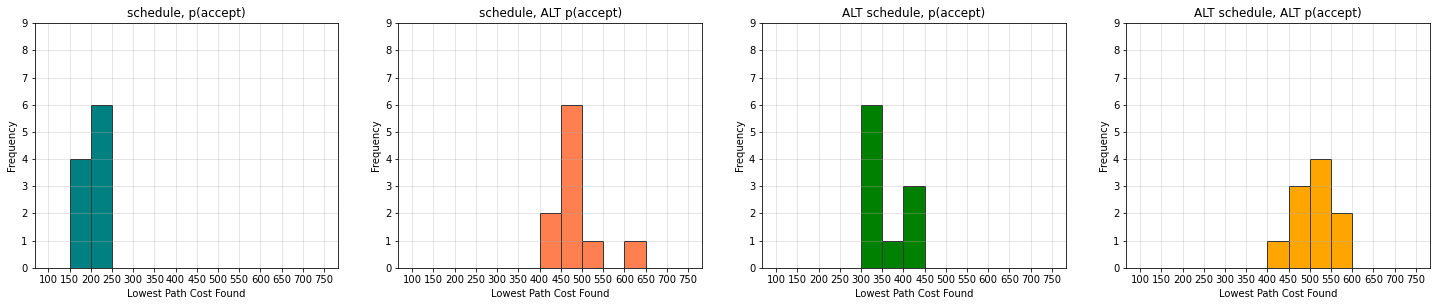

In [25]:
##NOTE - this cell may take a minute or so to run! 

#visualization of success times/paths of different implementations

num_sims = 1000 #how many times/how long to run each simulated annealing problem for 
runs = 10 #how many runs per problem. You can change this to more runs if you like data and don't mind a bit extra more waiting 
hist_bins = range(100,800, 50)

#containers for the histograms 
out_1 = []
out_1_paths = [] #separate array for paths, useful for plotting the eventually shortest generated path by this combination
out_2 = []
out_3 = []
out_4 = []

#run functions 
for run in range(runs): 
    out_1_path, out_1_cost = simulate_annealing(num_sims, schedule, p_accept_f, True)  #original temp & p(accept)
    out_1.append(out_1_cost)
    out_1_paths.append(out_1_path) #retroactively added this to be able to print the path later 
    
    #out_1.append(simulate_annealing(num_sims, schedule, p_accept_f)) #original temp & p(accept)
    out_2.append(simulate_annealing(num_sims, schedule, p_accept_f_alt))  #original temp & ALT p(accept)
    out_3.append(simulate_annealing(num_sims, schedule_alt, p_accept_f))  #original temp & p(accept)
    out_4.append(simulate_annealing(num_sims, schedule_alt, p_accept_f_alt))  #original temp & p(accept)

#plot histograms 
fig, ax = plt.subplots(1, 4, figsize=(25,4.5)) #4 subplots for each portion 
print(len(out_1))
ax[0].hist(out_1, bins = hist_bins, ec="black", fc = "teal")
ax[0].set_title("schedule, p(accept)")
    
ax[1].hist(out_2, bins = hist_bins, ec="black", fc = "coral")
ax[1].set_title("schedule, ALT p(accept)")

ax[2].hist(out_3, bins = hist_bins, ec="black", fc = "green")
ax[2].set_title("ALT schedule, p(accept)")

ax[3].hist(out_4, bins = hist_bins, ec="black", fc = "orange")
ax[3].set_title("ALT schedule, ALT p(accept)")


#set up ticks + labels for all axes: 
for i in range(len(ax)):
    ax[i].set_xlabel("Lowest Path Cost Found")
    ax[i].set_ylabel("Frequency")
    ax[i].set_yticks(np.arange(0,runs,1))
    ax[i].set_xticks(hist_bins)

    ax[i].grid(alpha=0.4) #display ticks with tranparency 
    
plt.show() 

This shows frequency histograms of the lowest-path-cost depending upon which pair of temp/p(accept) functions were run.


It looks like, based on the data, that the original (first) schedule function and first p(accept) function produce the most consistently lowest results, exclusively within the range of a 150-250 pathcost. Notice how these results tend to land on roughly the same range of inputs (within 100) whereas some of the other temperature functions tend to produce a more wide-spread version of answers. This is the teal on the histogram above. The lowest pathcost simulation is consistently generated by this first pair of functions, and is shown plotted above.

Through a bit of trial and error, I found out that it takes roughly 1000 iterations, on average, come within the range of 150-250 euclidian-distance path-cost for the first temp/p(accept) functions! 

**For the plot of the shortest path: see below:**

Min pathcost= 174.76  at index  2 and to verify, pathlength is 174.76 with path: [0, 6, 53, 45, 55, 37, 38, 47, 32, 44, 51, 54, 27, 25, 30, 28, 21, 29, 26, 22, 20, 24, 23, 52, 31, 39, 40, 43, 49, 46, 48, 36, 33, 34, 50, 42, 35, 8, 3, 2, 18, 9, 12, 15, 4, 17, 13, 7, 10, 16, 11, 14, 5, 1, 19, 41, 56]


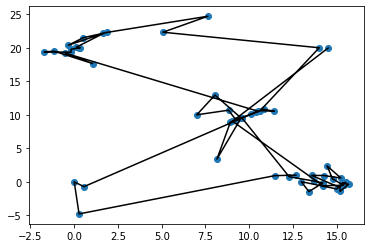

In [6]:
#retrieve shortest path found 
min_pathcost = min(out_1)
min_i = out_1.index(min_pathcost)
min_path = out_1_paths[min_i]

print("Min pathcost=", min_pathcost, " at index ", min_i, "and to verify, pathlength is", pathcost(min_path), "with path:", min_path)

#convert this path list back to nodes and plot it: 
df_fixed_index = df.reset_index(drop=True)    

#print(df_fixed_index.at[0, 'x'], df_fixed_index.at[0, 'y'])
x = []
y = []

#create an array of x and y points, populate with each point in the list
#I'm sure there's probably like, a better way of going about this with numpy arrays but eh, this is simplist way I know how 
for point in min_path:
    x.append(df_fixed_index.at[point, 'x'])
    y.append(df_fixed_index.at[point, 'y'])
    
#I consulted matplotlib documentation to get the style perfect! https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(x, y, color='black')
plt.scatter(x, y, color = 'C0')

As you can see above, this is the shortest path found by the algorithm when given a completely arbitrary list of random points, plotted above the original scatterplot

### Part E) Short Bonus (5 pts)

Suppose there existed a river that was very difficult to cross running along the line $x=10$ on the data set.  Adjust your edge costs so that any edge that cross this river has an added incurred cost equivalent to traveling an *additional* 10 miles.  Use your winning algorithm in Parts C/D to solve ths problem again, and as before plot the shortest path found and list its cost (distance plus any river crossings).

New cost: 241.23 with path [0, 18, 5, 16, 11, 15, 1, 3, 19, 13, 17, 10, 9, 6, 12, 4, 7, 2, 8, 40, 39, 37, 38, 47, 14, 32, 20, 31, 30, 21, 25, 22, 26, 51, 45, 55, 46, 34, 33, 41, 36, 49, 48, 28, 27, 24, 23, 54, 29, 52, 53, 50, 42, 43, 35, 44, 56] (and for reference, without the river, the pathcost is 221.23 )


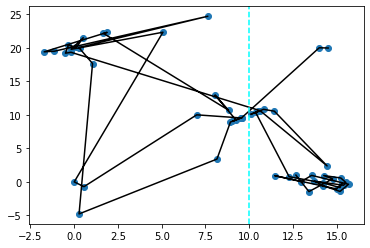

In [7]:
#define alt pathcost sim: 
def pathcost_alt(city_list):
    pathcost = 0  #initialize pathcost 
    for i in range(0, len(city_list)-1):
        #check if path is crossing river, i.e., if at any point the path crosses X = 10 
        if(df_fixed_index.at[city_list[i], 'x'] < 10.0  and df_fixed_index.at[city_list[i+1], 'x'] >= 10.0):
            pathcost += 10
        #make sure this is an elif so as not to count it twice 
        elif(df_fixed_index.at[city_list[i], 'x'] > 10.0  and df_fixed_index.at[city_list[i+1], 'x'] <= 10.0):
            pathcost += 10

        pathcost += distance(city_list[i], city_list[i+1]) #append distance between each node to total pathcost 
        
    return round(pathcost, 2) #round for simplicity


def simulate_annealing_river(num_sim, schedule_func, p_accept_func, ret_path = False):
    current =  initial_path() #retrieve initial path (a totally random path)
    current_cost = pathcost_alt(current) #get the current cost of the this inital path 
    #print(current_cost)
    
    for i in range(num_sim):
        current_temp = schedule_func(i) #get temp based on schedule function  
        
        #get the potential next path and its corresponding cost 
        possible_next = generate_new_path(current.copy(), current_temp)
        possible_next_cost = pathcost_alt(possible_next)
        
        #determine if this path is better than the old one 
        delta_cost = current_cost - possible_next_cost
        #if cost is an improvment.. (i.e., if the new cost is a better one)
        if delta_cost > 0:
            # the proposed move is an improvement, so accept w.p. 1
            current = possible_next.copy()
            current_cost = possible_next_cost
            
        #otherwise, determine probability of accepting it if the proposed path is worse 
        else:
            p_accept = p_accept_func(delta_cost, current_temp) #p(acceptance) function 
            accept = np.random.choice([True, False], p=[p_accept, 1-p_accept])
    
            if accept:
                current = possible_next.copy()
                current_cost = possible_next_cost  
                
    #check whether to return the end path or just the cost of the path 
    if(ret_path):
        return current, current_cost
    else:
        return current_cost 
                
                
    
##CALL UPDATED FUNCTION, with original p(accept) and temp functions which performed best 
river_path, river_cost = simulate_annealing_river(num_sims, schedule, p_accept_f, True)  #original temp & p(accept)

print("New cost:", river_cost, "with path", river_path, "(and for reference, without the river, the pathcost is", pathcost(river_path), ")")
##PLOT
df_fixed_index = df.reset_index(drop=True)    

x = []
y = []

for point in river_path:
    x.append(df_fixed_index.at[point, 'x'])
    y.append(df_fixed_index.at[point, 'y'])
    
plt.plot(x, y, color='black')
plt.scatter(x, y, color = 'C0')
plt.axvline(x=10.0, color='cyan', linestyle='--') #plot the river 

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Part 2: A Short Paper on Ethics and AI

Your task is to find a current event, project, or issue that relates to AI, and evaluate the ethics involved. You
must consider multiple points of view, not just your own as well as the implications that come from these points of
view.

We mentioned various ethical scenarios in class that can help you to consider your analysis. Remember in much of AI,
context is king. This can be the case in ethics also.  You may want to think about e.g. describing the types of competing loss/utility evaluations that might lead to different AI actions in the issue you choose.  You should also read about the 5 pillars of ethical standards here: https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/a-framework-for-ethical-decision-making/

Consider the effects and impacts of AI on everyday life. Some examples to consider:
- AI and Justice
- AI and Medicine
- AI and Civil Rights
- AI and Warfare
- Defining AI
- AI Regulation
- AI and Human Jobs
- AI and Privacy
- Fair AI
- AI and Misinformation

You are welcome to discuss another topic providing there is enough AI content to make it relevant.

<span style="color:red">**NOTE: I will also turn this in as a PDF in case the formatting here is weird**</span>

**AI-Generated Fake News and the Dilemma of Misinformation**

   In the ever-expanding world of the internet and social media, perhaps one of the things that we encounter most often is false information - more specifically, fake news, false information, or over-exaggerated points from media outlets which are intended to evoke emotion instead of informing the reader. This type of content can be found whether the information is spread maliciously or unintentionally due to the easily-accessible nature of posting on social media sites. Regardless of the intention, and due to both the sheer volume of content and amount of unreliable news stories, disinformation can spread incredibly rapidly and gain traction and following as a result of the ease of sharing. This presents a serious problem when combined with the potential of AI-generated content and news. 


   Because of the way that human speech patterns are incredibly repetitive and quantifiable, specifically in writing, AI is able to mimic human writing patterns to a tee, and produce information as a result of language combinatory logic and massive amounts of data. A case study which was presented in New York Times illustrates a fantastic case study of the consequences of this - a company known as OpenAI has created an AI which generates news articles based on data that it is fed, mimicking English writing patterns and utilizing nonfiction events to generate artificial news content which is eerily similar to human writing. In fact, the content is so well produced that the authors of the article actually point out having trouble telling the real human writing from the AI writing in some cases. The authors show how when given a prompt to write about US political parties, for example, the content of the article dynamically changes depending upon the commonly held viewpoints of each party \[1\]. As it stands - these types of advanced content-generation programs are exclusively reserved for researchers and the companies that developed them, and are not being released to the general public. 
   
   
Why does choice to release or not release this technology present an ethical dilemma? The authors of this article first point out that this presents a dangerous way for misinformation to be spread, especially on a wide scale. When this is in the hands of researchers or academics, it is less of an issue and more of an area of study about content generation, but if such a technology becomes open-source and available to the general public, this is where the problem begins to unfold. The NYT article points out if these tools are utilized by bad actors, content-generation en masse can actually be a powerful tool for spreading propaganda and disinformation harming the public as a result. 


On the other hand, others have argued that such content generation isn’t inherently flawed. An article from The Verge points out that when moderated, such content being made available to the public can be a powerful tool for researchers \[2\], and the fear that it could be used negatively can perhaps be overstated  due to current limitations with the technology. For one thing, they point out that OpenAI’s generated articles aren’t flawless, and moreover, can never replace previously credibly-established news organizations. Moreover, for uses like entertainment media, this can actually have huge advantages, as no-name sites and companies seeking to make traffic-driven ad-revenue are able to profit for actually very little work when utilizing similar algorithms to generate articles regardless of content, as one CNBC author notes \[4\]. 


One of the ways to examine this dilemma on a more abstract level is outlined in an UCS article on ethical studies \[3\]. Through the use of an ethical framework known as utilitarianism, the idea that ‘utility’ or overall ‘goodness’ ought to be maximized, reducing the amount of harm in the world. In the case, the question becomes - are the research opportunities and potential gains from releasing this technology worth releasing AI programs which can generate this type of content rapidly? An issue that can be raised with this is that the amount of overall harm done via the proliferation of fake articles and AI generated content being shared and spread by social media may, in fact, far outweigh the simple research opportunities and value gained from releasing such technology as open-source and giving access to the public. However, dissenters may argue that begs the question whether such AI generated fake-news could hypothetically be prolific enough to spread disinformation, i.e., would the net harm done actually be as prolific as some researchers are concerned about? If the technology isn’t perfect, and is only used within the sphere of less-consequential entertainment media for example, why worry? For this, one can argue, when combined with something like a botnet, for example, it can be used by people en masse to ostensibly drown out real information and news stories reaching social media before other companies report on issues. It can cloud the facts of a story with similar-sounding or similarly written but not objectively true content. This presents the issue of decreasing overall net-utility as a result of the technology being released. 

When arguing the question of rights, whether people have a right to this fake-news AI, perhaps this is less suited for the scope of this paper, suffice to say that the question whether people have a right to AI driven-content is perhaps hard to fully answer without asking questions about the ownership of scientific discoveries and intellectual property. 
The “common good” lens can also be used here, such that, is there a common-good for the public to be able to generate AI fake news? It is difficult to say, especially considering the fact that corporations can absolutely monetize this with traffic-based revenue, while the overall common good from simply reading this AI-created news may not actually be worth it. Of course, this all depends on the accuracy, intention, and methods by which this AI is used. AI generated news, if used as a tool for research, could actually benefit those seeking to combat fake news and identify methods by which AI-driven content could be classified, increasing the common-good to most peoples’ lives, such that they could ironically see less fake news. 


This, in turn, leads us to view this dilemma through the lens of virtue \[3\] - when presented with the opportunity for massive amounts of AI driven content, will this be used for morally virtuous pursuits? Perhaps, one can argue, the proliferation of AI driven content with fake news can be used to drown out propaganda, or even used to quickly produce legitimate information when combined with factually-verified data to generate content. Again, citing the example previously, this technology could be utilized by researchers to combat fake news. On the other hand, we must ask ourselves whether such pursuits will, in fact, be followed by the general public and corporations valuing a profit, further abstracting the problem to whether people will act virtuously when presented with such powerful tools of content generation.


   Regardless of the ethical framework though, there are several consequences which fall from both the action of continuing to generate such fake news and release the methods to do so to the general public. Even if researchers were able to identify the fake news now, with foreseeable improvements of the technology in the future, that line begins to blur. What then are they to do? Furthermore, when this technology is combined with botnets, massive media conglomerates, and the ever-expanding world of social media, it raises concerns about the legitimacy of information and being able to quickly verify and fact-check this news, which is already a growing problem. 
To conclude, this type of technology can be perhaps ethically positive, in the sense that it can be monetizing non-essential news media like entertainment and combating fake news, however the potential for misinformation of truly important stories, political news, or bad actors to take over the content, or to simply flood the market with misinformation, regardless of intent, is simply too great. It doesn’t benefit the common good, nor does it guarantee people will act in a virtuous way if this AI is able to be used by everyone. In an already over-saturated world of media content spread via social media, we need to ask ourselves whether utilizing AI to generate fake news articles is the most ethical thing to do. With the sheer volume of content able to be produced at any given moment means that given a proper outlet, such articles can spread to an absolutely absurd amount of people over such an amount of time, creating a veritable ocean of content which is impossible to keep up with and fact-check every detail. 


As it stands, I would wholeheartedly fall within the argument that releasing this AI-content-generation tool to the general public is dangerous, due to the amount of potential utilitarian harm, the lack of common-good, and the questionable virtuousness of individuals who have this technology. The technology is still too much in its infancy phase, and combined with social media and the potentiality for bad actors to use this, presents a dangerous future where we can no longer tell the difference between real and fake news. 


**REFERENCES**: 

\[1\] Cade Metz and Scott Blementhal, 2019. *How A.I. Could Be Weaponized to Spread Disinformation*. The New York Times. Retrieved from https://www.nytimes.com/interactive/2019/06/07/technology/ai-text-disinformation.html

\[2\] James Vincent  Feb 21, 2019. *AI researchers debate the ethics of sharing potentially harmful programs*.  The Verge. Retrieved from Retrieved from https://www.theverge.com/2019/2/21/18234500/ai-ethics-debate-researchers-harmful-programs-openai

\[3\] SCU. Santa Clara University, Markkula Center for Applied Ethics. *A Framework for Ethical Decision Making*. Retreived from https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/a-framework-for-ethical-decision-making/

\[4\] Megan Graham, 2020. *To Show How Easy It Is For Plagiarized News Sites To Get Ad Revenue, I Made My Own*. CNBC, retrieved from https://www.cnbc.com/2020/05/17/broken-internet-ad-system-makes-it-easy-to-earn-money-with-plagiarism.html


## Technical Details

Your paper should be approximately 1000 - 1500 words.

You will then need to collect sources surrounding this scenario. These can be newspaper articles, blog posts, book chapters etc. It is always good to have more than one source, now more than ever. You are free to choose your topic around what interests you, but I recommend that you read the grading rubric
below before making a final choice. Make sure you choose a topic on which you can write a paper to earn maximum
points.

I expect this assignment to use references appropriately and all references should be in the ACM Format (see:https://www.acm.org/publications/authors/reference-formatting).

For your consideration: preliminary rubric

- (a) [10 pts] Summarize your scenario. What is the problem that is being solved and what is the method used to solve it. This should include references to where you read about it. There maybe multiple articles on the same topic saying different things, you may wish to discuss both.
- (b) [6 pts] Describe the AI involved. Why was AI the solution? Is there a human solution? If so, why was the AI solution used.
- (c) [14 pts] Discuss the Ethical considerations of this scenario. If there is more than one side to the argument you should consider them all. (For almost all studies there will be multiple viewpoints). I recommend using the moral frameworks discussed in class to break down the scenario, either through analysing Moral Intensity of the five aspects of the Markkula Framework.
- (d) [6 pts] Discuss the Implications of this case study. How do the actions taken impact the future? What ethical debate can you forsee in the future?
- (e) [6 pts] Discuss how this case study relates to Ethics in AI as a whole. Is this case study representative? atypical? Somewhere in the middle? Why?
- (f) [4 pts] Conclude your paper, there should be a take home message. If you wish to include a personal opinion, this is the section in which to do that
There will also be points for:
- (g) [2 pt] Presentation, Spelling and Grammar
- (h) [2 pt] Appropriate Referencing

<br>

---
[Back to top](#top)
<a id='bot'></a>